(16, 1, 2)


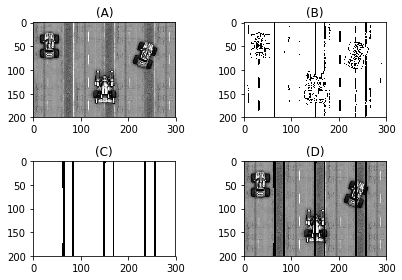

In [33]:
#直线检测
import cv2
from matplotlib import pyplot as plt 
import numpy as np

img=cv2.imread("../picture/road.jpg")
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_img=gray_img.copy()

#Canny边缘检测边缘检测
edges = cv2.Canny(gray_img, 150, 300)

#对二值图像进行反转  黑白颠倒
notedges=cv2.bitwise_not(edges)

#构造空白图像
clean_img=np.ones_like(show_img)


#检测直线
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
print(lines.shape)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+1000*(a))
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*(a))
    cv2.line(show_img, (x1, y1), (x2, y2), (0, 0, 0), 2)
    cv2.line(clean_img, (x1, y1), (x2, y2), (0, 0, 0), 2)



plt.subplot(221)
plt.imshow(gray_img,cmap=plt.cm.gray) 
plt.title("(A)")

plt.subplot(222)
plt.imshow(notedges,cmap=plt.cm.gray) 
plt.title("(B)")

plt.subplot(223)
plt.imshow(clean_img,cmap=plt.cm.gray) 
plt.title("(C)")

plt.subplot(224)
plt.imshow(show_img,cmap=plt.cm.gray) 
plt.title("(D)")


plt.tight_layout()